In [1]:
import random
import matplotlib.pyplot as plt
from functools import reduce
import itertools as it
from collections import Counter
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
import numpy.random as npr

In [2]:
n = 20
m = 10 * n

max_strat = 6
min_strat = -5

max_score = 5
min_score = -5

cost = 1
benefit_score = 1
benefit = 10

generations = pow(10, 6)
mutation_probability = 0.001

In [3]:
class Agent:
    def __init__(self, strategy, score, payoff):
        self.payoff = payoff
        self.strategy = strategy
        self.score = score
        
    def add_score(self, new_score):
        temp_score = new_score + self.score
        if temp_score >= min_score and temp_score <= max_score:
             self.score = temp_score
        elif temp_score <= min_score:
            self.score = min_score
        elif temp_score >= max_score:
            self.score = max_score

In [4]:
def selectOne_t(population):
    max_value     = sum([c.payoff for c in population])
    pick    = random.uniform(0, max_value)
    current = 0
    for agent in population:
        current += agent.payoff
        if current > pick:
            return agent
        
def selectOne(population):
    max_value = sum([c.payoff for c in population])
    selection_probs = [c.payoff/max_value for c in population]
    return population[npr.choice(len(population), p=selection_probs)]


In [5]:
#value = np.random.normal(loc=n/2, scale=1, size=10000)
#plt.hist([v for v in value if (v > 0 and v < n)], bins = 100)
#plt.show()

In [6]:
def get_number_of_agents_to_watch():
    agents_that_watch = int(np.random.normal(loc=10, scale=1))
    while agents_that_watch < 0 or agents_that_watch > 20: # we need to have n-2 because we don't want the donor nor the recipient to be choosen as agents that observe...
        #we also need that the number is at least 2 because we want a donor and a recipient...
        agents_that_watch = int(np.random.normal(loc=10, scale=1))
    return agents_that_watch


#def get_number_of_agents_to_watch():
#    agents_that_watch = int(np.random.normal(loc=(0+20)/2, scale=1))
#    while agents_that_watch < 2 or agents_that_watch > (n-2): # we need to have n-2 because we don't want the donor nor the recipient to be choosen as agents that observe...
#        #we also need that the number is at least 2 because we want a donor and a recipient...
#        agents_that_watch = int(np.random.normal(loc=n/2, scale=1))
#    return agents_that_watch

print(get_number_of_agents_to_watch())


def get_random_normal_strategy():
    random_strategy = random.randint(min_strat, max_strat)
    #random_strategy = round(np.random.normal(loc=(min_strat+max_strat)/2, scale=5))
    #while random_strategy < min_strat or random_strategy > (max_strat): # we need to have n-2 because we don't want the donor nor the recipient to be choosen as agents that observe...
        #we also need that the number is at least 2 because we want a donor and a recipient...
    #    random_strategy = round(np.random.normal(loc=(min_strat+max_strat)/2, scale=5))
    return random_strategy

10


generations: 1000000
0


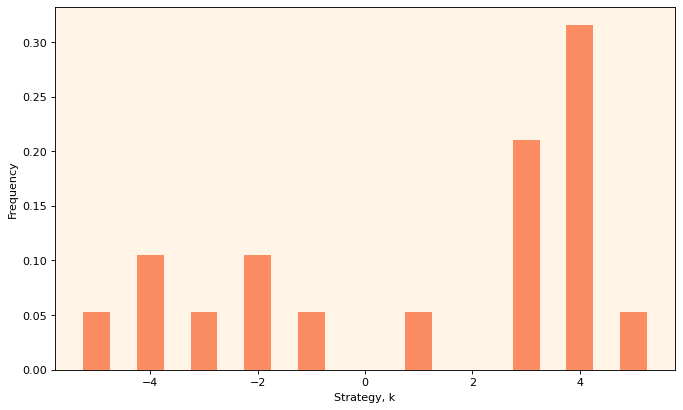

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


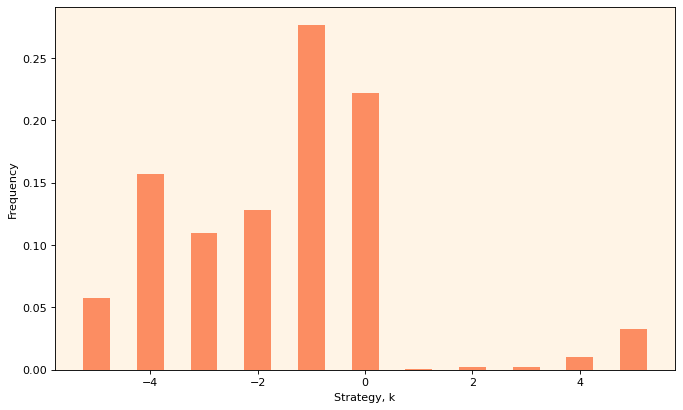

110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


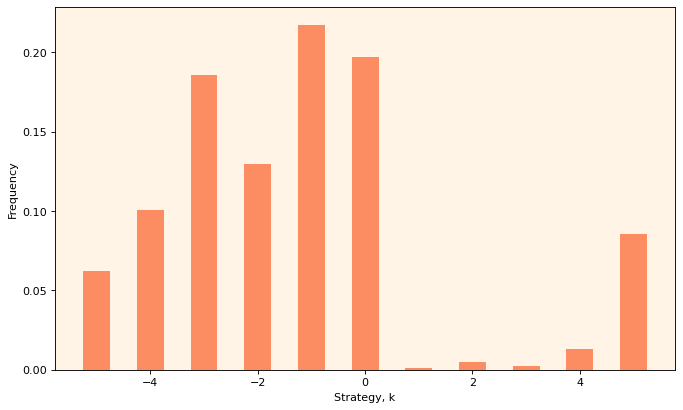

210000
220000
230000
240000
250000
260000
270000
280000
290000
300000


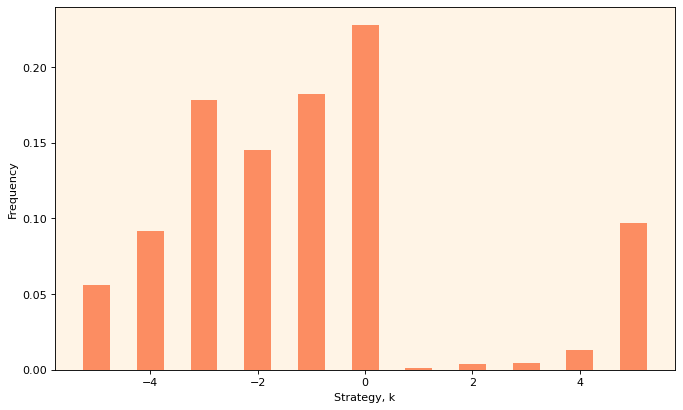

310000
320000
330000
340000
350000
360000
370000
380000
390000
400000


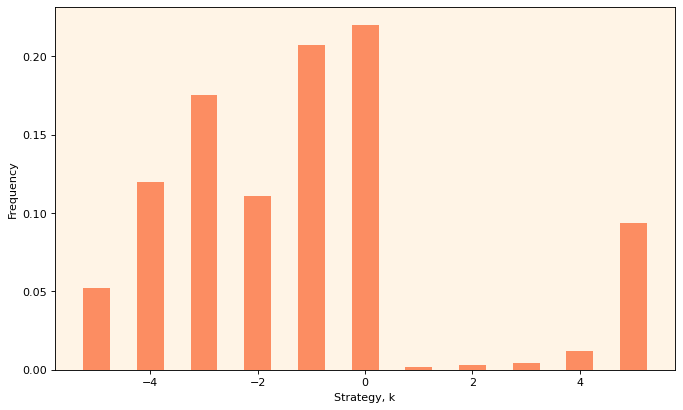

410000
420000
430000
440000


KeyboardInterrupt: 

In [7]:
agents = []
strategies_choosen = []
agent_matrix = np.zeros((n,n))

for i in range(n):
    #agents.append(Agent(random.randint(min_strat, max_strat), 0, 0))
    agents.append(Agent(get_random_normal_strategy(), 0,0))
    
print("generations: {}".format(generations))
for generation in range(int(generations)):
    
    if generation % 10000 == 0:
        print(generation)
        
    for pair in range(m):
        number_of_watchers = get_number_of_agents_to_watch()
        agents_to_sample_from = random.sample(range(n), number_of_watchers)
        donor, recipient = agents[agents_to_sample_from[0]], agents[agents_to_sample_from[1]]
        
        if agent_matrix[agents_to_sample_from[1]][agents_to_sample_from[0]] >= donor.strategy:
            recipient.payoff += benefit
            donor.payoff -= cost
                
            donor.add_score(benefit_score)

            for observer in agents_to_sample_from:
                agent_matrix[agents_to_sample_from[0]][observer] += benefit_score
        else:
            donor.add_score(-benefit_score)
            for observer in agents_to_sample_from:
                agent_matrix[agents_to_sample_from[0]][observer] -= benefit_score
            
    #    recipient.payoff += c
    #    donor.payoff += c
    # we need to add +c because otherwise we will have trouble selecting an agent...
    #for agent in agents:
    #    if agent.payoff < 0:
    #        agent.payoff = 0

    current_payoffs = []
    for agent in agents:
        current_payoffs.append(agent.payoff)
            
    min_payoff = min(current_payoffs)
        
    if min_payoff <= 0:
        for agent in agents:
            agent.payoff = agent.payoff + (-1)*min_payoff + 1
    elif min_payoff >1:
        for agent in agents:
            agent.payoff = agent.payoff - (min_payoff -  1)
    
    new_agents = []

    
    if sum([c.payoff for c in agents]) == 0:
        for agent_toCopy in agents:
            new_agents.append(Agent(agent_toCopy.strategy, 0,0))
    else:
        for agent in range(n):
            random_value = random.uniform(0.000, 1.000)

            if random_value <= mutation_probability:
                new_agents.append(Agent(get_random_normal_strategy(), 0,0))
            else:
                parent = selectOne(agents)
                new_agents.append(Agent(parent.strategy, 0,0))
            
    agents = new_agents
    
    for agent in agents:
        strategies_choosen.append(agent.strategy)    
        
    if generation % 100000 == 0:
        figure(figsize=(10, 6), dpi=80)
        ax = plt.gca()
        ax.set_facecolor("#fff4e6")

        plt.xlabel('Strategy, k')
        plt.ylabel('Frequency')
        strategies_choosen_np = np.array(strategies_choosen)
        plt.hist(strategies_choosen_np, bins=np.arange(strategies_choosen_np.min(), strategies_choosen_np.max()+1)-0.5, color=sns.color_palette('Set2')[1], rwidth = 0.5, density=True)

        plt.show()
        
    agent_matrix = np.zeros((n,n))
    
print("Done :D")

In [ ]:
figure(figsize=(20, 6), dpi=280)
ax = plt.gca()
ax.set_facecolor("#fff4e6")

plt.xlabel('Strategy, k')
plt.ylabel('Frequency')
strategies_choosen_np = np.array(strategies_choosen)
plt.hist(strategies_choosen_np, bins=np.arange(strategies_choosen_np.min(), strategies_choosen_np.max()+1)-0.5, color=sns.color_palette('Set2')[1], rwidth = 0.5)

plt.show()